In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import transactionencoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
book = pd.read_csv("book.csv")

In [3]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Data preprocessing not required as it is already in transaction format

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



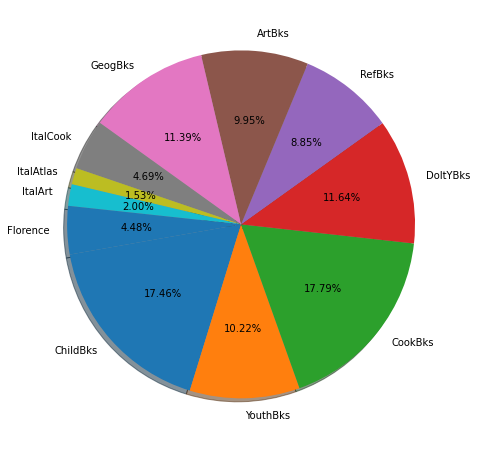

In [6]:
plt.figure(figsize = (12,8))
plt.pie(book.sum(),
       labels=book.columns,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190)
plt.show()

In [7]:
count = book.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [8]:
count = count.to_frame().reset_index()
count

,index,0
0,ChildBks,846
1,YouthBks,495
2,CookBks,862
3,DoItYBks,564
4,RefBks,429
5,ArtBks,482
6,GeogBks,552
7,ItalCook,227
8,ItalAtlas,74
9,ItalArt,97


In [9]:
count= count.rename(columns= {'index':'items', 0:'count'})


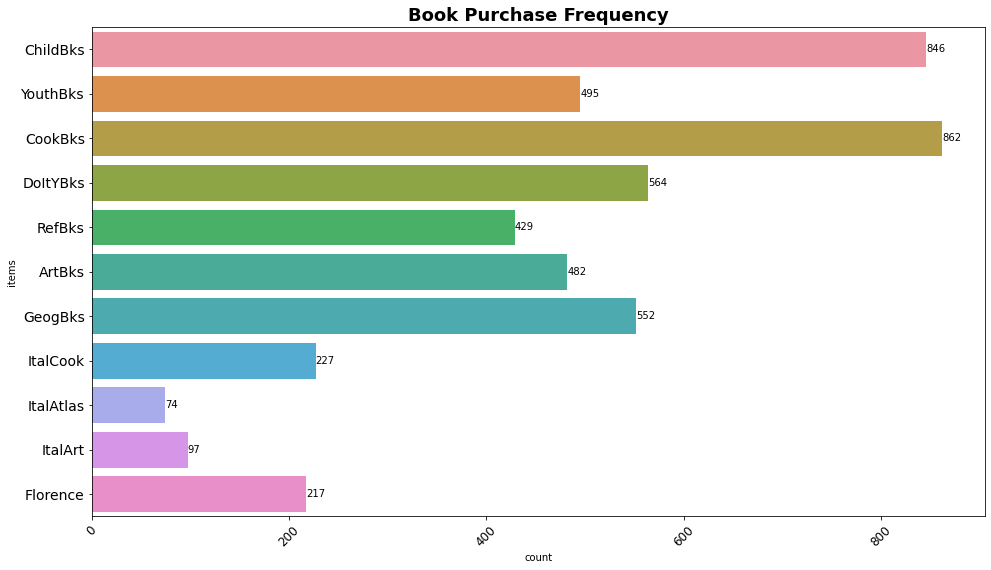

In [10]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Book Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
# With 10% Support
frequent_itemset = apriori(book,min_support=0.1,use_colnames=True)
frequent_itemset

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [12]:
# With 70% Confidence
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [13]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [14]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [15]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


# Visualization for Obtained rule

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

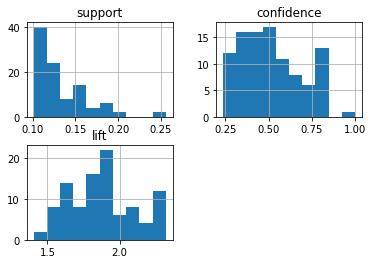

In [16]:
rules[['support','confidence','lift']].hist()

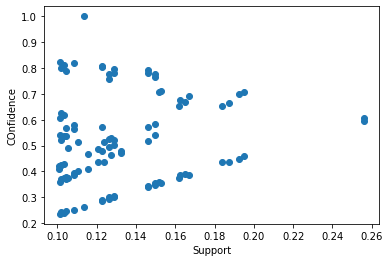

In [17]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('COnfidence')
plt.show()

In [18]:
# With 15% support
frequent_itemset1 = apriori(book,min_support=0.15, use_colnames=True)
frequent_itemset1

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [19]:
rules1 = association_rules(frequent_itemset1,metric='lift',min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [20]:
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


In [21]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


# Visualization for Obtained Rule

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

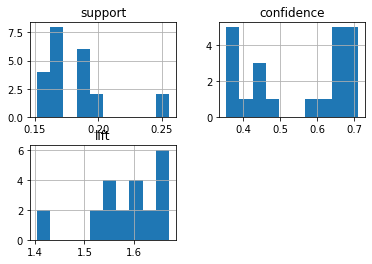

In [22]:
rules1[['support','confidence','lift']].hist()

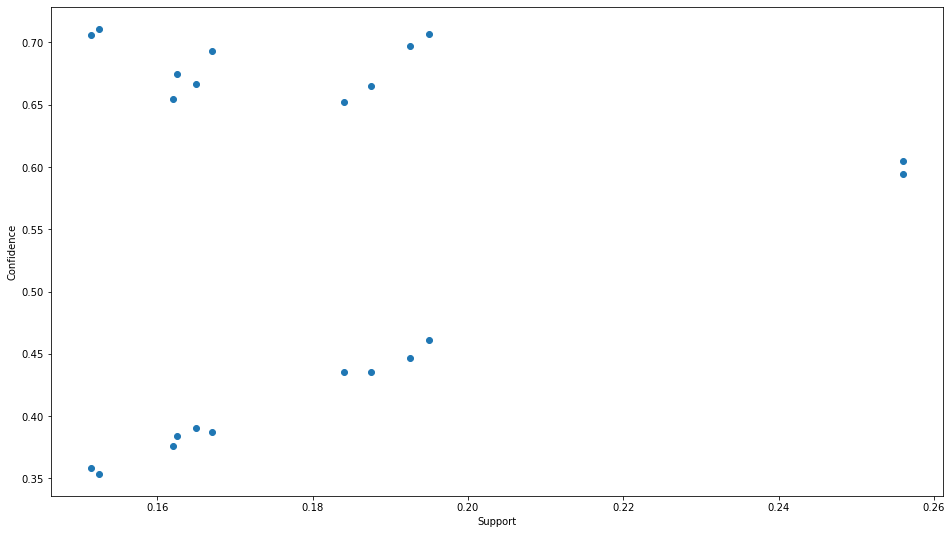

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()